# Bounce Approximation for a static quartic potential
On attempting to solve for a scalar field, with the potential (in Minkowski space i.e. real space), shown below:

$V_{Minkowski}(\phi) = \mu^{2}\phi^{2}- A\phi^{3} + \lambda \phi^{4}$
(where $\phi$ is the function for the scalar field)...

[$\mu , A, \lambda > 0$;... A > 2$\mu \lambda$;... so as to maintain potential of shape shown below.]

.

A Wick Rotation was performed, taking the problem to the Euclidean space:

$V_{Euclidean}(\phi) = -\mu^{2}\phi^{2} + A\phi^{3} - \lambda \phi^{4} = - V_{Minkowski}(\phi)$ = V (in my code)

And so, as adapted from a paper by Sidney Coleman in 1977, and my supervisors' work, the equation to solve becomes:

$ \frac{d^{2}\phi}{d\rho^{2}} + \frac{(d.o.f. - 1)}{\rho}\frac{d\phi}{d\rho} + \frac{dV_{Euclidean}}{d\phi} = 0 $

where the fundamental assumptions are:

a) $\rho = \sqrt{x^2 + y^2 + z^2}$ so d.o.f. = 3 (all in Euclidean space)

b) We're ignoring time and temperature for now... so ignore inconsistencies in dimensions for now.

c) Scalar field is only a function of spatial dimensions and is radially symmetric -> $\phi(\rho)$ (this is the fundamental ansatz behind the bubble/bounce approximation, since we are assuming a phase change)

d) Boundary conditions are $\frac{d\phi}{d\rho} |_{\rho = 0}$ = 0;  $\phi(\rho = \infty)$ = 0

### -------------------------------------------------------------------------------------------------------------------
And so, the equation boils down to:

## $ \frac{d^{2}\phi}{d\rho^{2}} = - \frac{2}{\rho}\frac{d\phi}{d\rho} - (-2\mu^{2}\phi + 3A\phi^{2} - 4\lambda \phi^{3})$

### with Boundary conditions: $\frac{d\phi}{d\rho} |_{\rho = 0}$ = 0;      $\phi(\rho = \infty)$ = 0
### --------------------------------------------------------------------------------------------------------------------

Once we find $\phi(\rho)$, we calculate the Euclidean action:

$S_{Euclidean} = \int [\frac{1}{2}(\frac{d\phi}{d\rho})^{2} - V_{Euclidean}(\phi)]d^{3}x $

   = $ \int\int\int [\frac{1}{2}(\frac{d\phi}{d\rho})^{2} - V_{Euclidean}(\phi)]\rho^{2}sin(\theta) d\rho d\theta d\psi $

## => $S_{Euclidean}[\phi(\rho)] = 4\pi \int [\frac{1}{2}(\frac{d\phi}{d\rho})^{2} - V_{Euclidean}(\phi(\rho))]\rho^{2} d\rho $
.
--------------
Note: For $\alpha$ < 0.52, solution cannot be found accurately.
### ---------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np

In [2]:
%matplotlib nbagg

In [3]:
import matplotlib.pyplot as plt

### Accounting for Dimensions

All the quantities above have dimensions. 

In the typically used convention $\hbar$ = c = 1, 

[$\phi$] = M, 
[$\rho$] = M$^{-1}$, 
[$\mu$] = M, 
[A] = M, 
[$\lambda$] = 1, 
[V] = M$^{4}$

and 
[S] = 1 (because time has already been accounted for by temperature, in calculations beyond the purview of this write-up)

where M holds the dimensions of energy.

------------------------------------------------------------------------------------------------------------------------

Now, to get a system that does not have it's basic design (like, for example, the location of "infinity", or the basic shape of the curve) depending on these parameters, we must use dimensionless quantities. So, redefining:

$\phi$  ->  $\frac{\phi_{dimesionful}}{M}$

$\rho$  ->  $\rho_{dimesionful}.M$

$\mu$  ->  $\frac{\mu_{dimesionful}}{M}$

$A$  ->  $\frac{A_{dimesionful}}{M}$

So now everything is dimensionless and we're all set.

If you want to dimensionful answers, AFTER you've found $\phi$ and $\rho$, transform them back to $\phi_{dimesionful}$ and $\rho_{dimesionful}$

Below code allows you to choose $\mu$, $\lambda$ and dA; all greater than 0

In [4]:
lam_dimensionful = 1 #lamda is dimensionless even by convention, so this is a little redundant.
mu_dimensionful = 1
dA_dimensionful = 0.3
A_dimensionful = 2*mu_dimensionful*lam_dimensionful + dA_dimensionful

In [5]:
M = mu_dimensionful #i.e. let dimensionless mu = 1; M contain the dimensions of the question.

In [6]:
lam = lam_dimensionful
mu = 1
A = A_dimensionful/M

### Potential of the scalar field in Euclidean space

In [7]:
V= lambda x: -1*(x**2)*(mu**2 - A*x + lam*x**2) #Takes in dimensionless x; returns dimensionless V

In [8]:
phi_localmax = (3*A + np.sqrt(9*A**2 - 32*mu*mu*lam))/(8*lam)
phi_localmin = (3*A - np.sqrt(9*A**2 - 32*mu*mu*lam))/(8*lam)
phi_localzero = (A - np.sqrt(A**2 - 4*mu*mu*lam))/(2*lam)

In [9]:
V_pr = lambda x: -1*(2*(mu**2)*x - 3*A*x**2  + 4*lam*x**3) #Takes in dimensionless x; returns dimensionless V'

In [10]:
V_peak = V(phi_localmax)
V_pit = V(phi_localmin)
V_zero = V(phi_localzero)

<IPython.core.display.Javascript object>


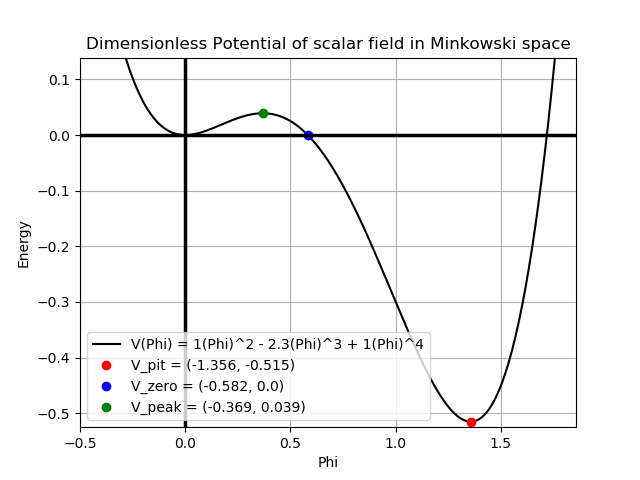

<IPython.core.display.Javascript object>


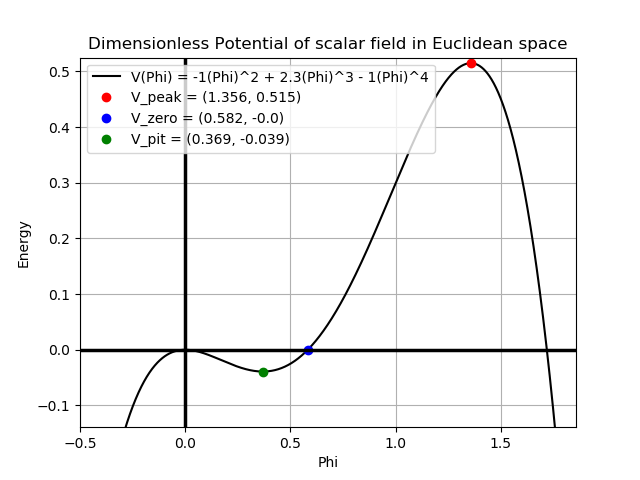

In [11]:
plt.close()

#Plotting dimensionless values
phi_vals = np.linspace(-0.5, 10, 10000)

fig2 = plt.figure()
label2 = "V(Phi) = " + str(np.round(mu**2, 3)) +"(Phi)^2 - " + str(np.round(A, 3)) + "(Phi)^3 + " + str(np.round(lam, 3)) + "(Phi)^4"
plt.plot(phi_vals, -1*V(phi_vals), 'k-', label= label2)
pt4 = "V_pit = " + str((np.round(-1*phi_localmax, 3), np.round(-1*V_peak, 3)))
pt5 = "V_peak = " + str((np.round(-1*phi_localmin, 3), np.round(-1*V_pit, 3)))
pt6 = "V_zero = " + str((np.round(-1*phi_localzero, 3), np.round(-1*V_zero, 3)))
plt.plot(phi_localmax, -1*V_peak, 'ro', label=pt4)
plt.plot(phi_localzero, -1*V_zero, 'bo', label=pt6) 
plt.plot(phi_localmin, -1*V_pit, 'go', label=pt5)
plt.plot([0, 0], [-1*V_pit + 0.1, -1*V_peak - 0.01], 'k-', linewidth=2.5)
plt.plot([-0.5, phi_localmax + 0.5], [0, 0], 'k-', linewidth=2.5)
plt.ylim(-1*V_peak - 0.01, -1*V_pit + 0.1)
plt.xlim(-0.5, phi_localmax + 0.5)
plt.xlabel("Phi")
plt.ylabel("Energy")
plt.title("Dimensionless Potential of scalar field in Minkowski space")
plt.legend()
plt.grid()

fig1 = plt.figure()
label1 = "V(Phi) = " + str(np.round(-1*mu**2, 3)) +"(Phi)^2 + " + str(np.round(A, 3)) + "(Phi)^3 - " + str(np.round(lam, 3)) + "(Phi)^4"
plt.plot(phi_vals, V(phi_vals), 'k-', label= label1)
pt1 = "V_peak = " + str((np.round(phi_localmax, 3), np.round(V_peak, 3)))
pt2 = "V_pit = " + str((np.round(phi_localmin, 3), np.round(V_pit, 3)))
pt3 = "V_zero = " + str((np.round(phi_localzero, 3), np.round(V_zero, 3)))
plt.plot(phi_localmax, V_peak, 'ro', label=pt1)
plt.plot(phi_localzero, V_zero, 'bo', label=pt3) 
plt.plot(phi_localmin, V_pit, 'go', label=pt2)
plt.plot([0, 0], [V_pit - 0.1, V_peak + 0.01], 'k-', linewidth=2.5)
plt.plot([-0.5, phi_localmax + 0.5], [0, 0], 'k-', linewidth=2.5)
plt.ylim(V_pit - 0.1, V_peak + 0.01)
plt.xlim(-0.5, phi_localmax + 0.5)
plt.xlabel("Phi")
plt.ylabel("Energy")
plt.title("Dimensionless Potential of scalar field in Euclidean space")
plt.legend()
plt.grid()

In [12]:
plt.close()
plt.close()

Any Quartic 2-3-4 polynomial can be expressed as:

$V(x) = -\Lambda^{4}.((\frac{3 - 4\alpha}{2}).(\frac{x}{x_{2}})^{2} - (\frac{x}{x_{2}})^{3}  + \alpha.(\frac{x}{x_{2}})^{4})$

where, 

$\Lambda$ is the scale determined by the "height" of the 2nd, "bigger", curvature ($V_{peak}$ in the Euclidean space diagram) w.r.t. the first one ($V_{pit}$ in the Euclidean space diagram).

$x_{2}$ is the position of the 2nd, "bigger", curvature (phi_localmax in the Euclidean space diagram)

and $\alpha$ is a parameter such that 0.5 <  $\alpha$ < 0.75 for the polynomial to maintain the shape shown above (i.e. not have any repeating roots or imaginary roots... and letting the 2nd curvature be the bigger one).

.
--------------------------------------------------------------------------------------------------------------
Comparing with the quartic potential of the scalar field in question:

$V_{Euclidean}(x) = -(\mu^{2} x^{2} - A x^{3} + \lambda x^{4})$

we have:

$x_{2}$ = $\frac{3A + \sqrt(9 A^{2} - 32 \mu^{2} \lambda)}{8 \lambda}$ (as seen in formula for phi_localmax)

$\alpha$ = $\frac {\lambda x_{2}}{A}$

$\Lambda^{4}$ = A $x_{2}^{3}$
.
---------------------------------------------------------------------------------------------------------------

If $\alpha$ $\leq$ 0.5, the 2nd curvature is no longer "bigger" than the first one i.e. $|V_{peak}| \leq |V_{pit}|$. But our question requires that $|V_{peak}| > |V_{pit}|$

And if $\alpha$ $\geq$ 0.75, there are repeated and/or imaginary roots i.e. $V_{pit}$ = 0. But our question requires that $|V_{pit}| > 0$

So those values of $\alpha$, and the ones near it, are problematic. 

$\alpha$ dictates the value of the "smart" infinity in our question; See section below.

---------------------------------------------------------------------------------------------------------------

### Smart-Infinity Search

In [13]:
alpha = lam*phi_localmax/A
height_like_pow4 = A*(phi_localmax)**3

print(alpha)

if alpha < 0.53:
    print("Your choice in parameters is problematic")
    print("Peaks are too close in height -> the well (in Minkowski space) is degenerate")
if alpha > 0.7:
    print("Your choice in parameters is problematic")
    print("There is no proper valley -> the barrier (in Minkowski space) is degenerate")

0.5897255028819393


In [14]:
infinity_vals = [29, 26, 22, 19, 16, 14, 12, 13, 15, 10]
alpha_vals = np.array([0.515, 0.52, 0.53, 0.54, 0.55, 0.57, 0.63, 0.7, 0.73, 0.745])
infinity_dicts = dict(zip(alpha_vals, infinity_vals))

#The above ideal values of infinity for given values of alpha, was found by trial and error

In [15]:
#This is to find which of the key values is our alpha value closest to... 
#and scale the distance between the alpha and the closest key(s)

minima_array = list(abs(alpha_vals - alpha))
which_one = []
which_one.append(minima_array.index(min(minima_array)))
diff = minima_array[which_one[0]]
minima_array[which_one[0]] = 10 #i.e. rewrite the array so that the next line could pick out the next minima in line
which_one.append(minima_array.index(min(minima_array)))

In [16]:
smart_infinity = infinity_vals[which_one[0]] + diff*(infinity_vals[which_one[1]] - infinity_vals[which_one[0]]) 

### Solving the equation

In [17]:
rho_lim = smart_infinity #dimensionless; this our "infinity"; change it if required.

In [18]:
dr = 1e-3 #dimensionless; this is our precision of integration -> do not change!

In [19]:
intlim = int(rho_lim/dr) #dimensionless; this is computational -> to get till above phi_lim for above precision.

In [20]:
dydt = lambda t, y, v: v
dvdt = lambda t, y, v: (-2*v/t) - V_pr(y)    #takes in dimensionless y, v, t and returns respective dimensionless value

In [21]:
def differentiator(fn, t, yv): #inputs all dimensionless... outputs all dimensionless...
    '''
    Solves 2nd order ODE y" + p(t)y' + q(t)y = r(y, t)
    written as a coupled system of 2 ODE.
    Uses the Stage-4 Runge-Kutta method.
    
    MUST BE USED ITERATIVELY.
    
    This method takes in:
    
    an array of variables 'yv', where:
    y = yv[0]
    v = yv[1] = y'
    
    And
    an array of functions 'fn', where:
    
    y' = fn[0] = v
    y" = fn[1] = v'
    '''
    dt = dr
    
    yr = yv[0]
    vr = yv[1]

    fn1 = fn[0] #dy/dt
    fn2 = fn[1] #dv/dt
    
    c1 = fn1(t, yr, vr)
    l1 = fn2(t, yr, vr)
    
    c2 = fn1(t + (dt/2), yr + (c1/2)*dt, vr + (l1/2)*dt)
    l2 = fn2(t + (dt/2), yr + (c1/2)*dt, vr + (l1/2)*dt)
    
    c3 = fn1(t + (dt/2), yr + (c2/2)*dt, vr + (l2/2)*dt)
    l3 = fn2(t + (dt/2), yr + (c2/2)*dt, vr + (l2/2)*dt)
    
    c4 = fn1(t + dt, yr + c3*dt, vr + l3*dt)
    l4 = fn2(t + dt, yr + c3*dt, vr + l3*dt)
    
    y_runge = yr + (c1 + 2*c2 + 2*c3 + c4)*dt/6
    v_runge = vr + (l1 + 2*l2 + 2*l3 + l4)*dt/6    
    
    return y_runge, v_runge

In [22]:
def shooting_solver(ini):
    '''
    Takes in a dimensionless initial value of phi, 
    and returns dimensionless solution to ode
    '''
    r0 = 0 #Just a little above 0, so as to avoid singularity; dimensionless
    p0 = ini #dimensionless
    p_pr_0 = 0 #dimensionless
    
    rho_array = []
    phi_array = []
    phi_pr_array = []
    
    rho_array.append(r0)
    phi_array.append(p0)
    phi_pr_array.append(p_pr_0)
    
    for i in range(1, intlim):
        rho_array.append(rho_array[i-1] + dr)
        
        xr, vr = differentiator([dydt, dvdt], rho_array[i], [phi_array[i-1], phi_pr_array[i-1]])
        
        phi_array.append(xr)
        phi_pr_array.append(vr)
        
        if abs(xr) > 1e4:
            break
    
    rho_array = np.array(rho_array)
    phi_array = np.array(phi_array) 
    phi_pr_array = np.array(phi_pr_array)
    
    return rho_array, phi_array, phi_pr_array

Below is the bissection search attempting to find the initial condition $\phi_{0}$ that satisfies expected boundary conditions. 

Evidently, $\phi_{0}$ lies between phi_localmax and phi_localzero. In terms of kinematics and energy conservation, the "damping" term $\frac{2}{\rho}\frac{d\phi}{d\rho}$ would cause energy decrease. And since the final energy is non-negative (0), the starting energy must be positive. So it can't be less than phi_localzero. And if it is greater than phi_localmax, the solution will "roll down the other side". So it can't be greater than phi_localmax.

Also note that the damping coefficient is $\frac{2}{\rho}$. So as $\rho$ goes to zero, damping effect increases. So it is reasonable to expect $\phi_{0}$ to be fairly close to phi_localmax.

In [23]:
lower = phi_localzero
upper = phi_localmax
initial_value = (lower + upper)/2
k = shooting_solver(initial_value)
original = initial_value
arg = k[1][-1]

while abs(arg) > 1e-4:
    if arg > 0:
        lower = initial_value
        initial_value = (lower + upper)/2 
        #print(initial_value)
        k = shooting_solver(initial_value)
        arg = k[1][-1]
        #print(arg, 0)
        if abs(original - initial_value) < 1e-10: #i.e. if it gets stuck at a value
            print("There seems to be a glitch here.")
            break
        original = initial_value
        
    else:
        upper = initial_value
        initial_value = (lower + upper)/2
        #print(initial_value)
        k = shooting_solver(initial_value)
        arg = k[1][-1]
        #print(arg, 1)
        if abs(original - initial_value) < 1e-10: #i.e. if it gets stuck at a value
            print("There seems to be a glitch here.")
            break
        original = initial_value

In [24]:
print(k[1][-1], k[2][-1], initial_value) #Phi(rho) and d(phi)/d(rho) at rho = infinity, should be = 0

-2.127323548385525e-05 -2.8602700406947018e-05 1.2324468242014701


### Dimensionless Plots

<IPython.core.display.Javascript object>


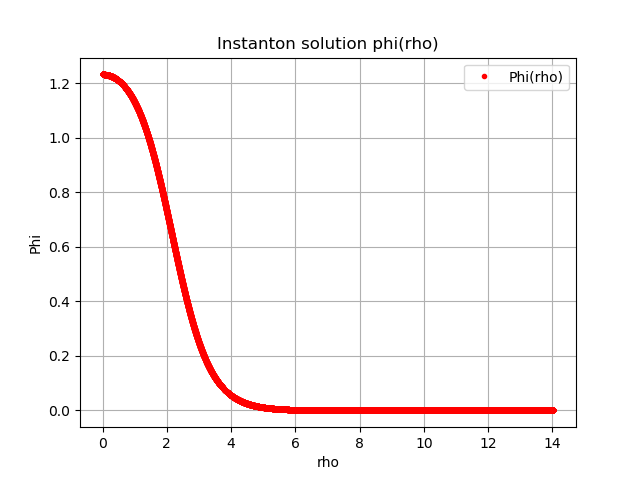

In [25]:
plt.close()
plt.plot(k[0], k[1], 'r.', label= "Phi(rho)")
plt.title("Instanton solution phi(rho)")
plt.ylabel("Phi")
plt.xlabel("rho")
#plt.xlim(0, 10)
#plt.ylim(-2, 2)
plt.legend()
plt.grid()

In [26]:
print(phi_localmax, phi_localzero, phi_localmin, V_peak, V_pit, V(phi_localzero))

1.35636865662846 0.5821091654199727 0.3686313433715398 0.5149641231083056 -0.039141076233306406 -3.7620027145239504e-17


<IPython.core.display.Javascript object>


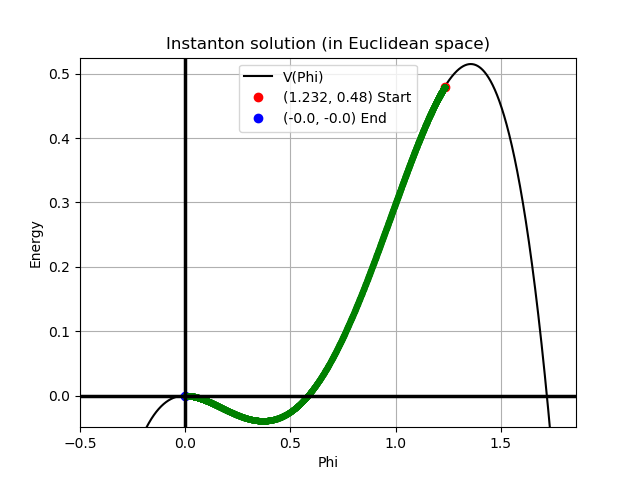

In [27]:
plt.close()

#Plotting dimensionless values

phi_vals = np.linspace(-0.5, 10, 10000)
plt.plot(phi_vals, V(phi_vals), 'k-', label= "V(Phi)")
point1 = str((np.round(k[1][0], 3), np.round(V(k[1][0]), 3))) + " Start"
plt.plot(k[1][0], V(k[1][0]), 'ro', label= point1)
point2 = str((np.round(k[1][-1], 3), np.round(V(k[1][-1]), 3))) + " End"
plt.plot(k[1][-1], V(k[1][-1]), 'bo', label= point2)
plt.plot(k[1], V(k[1]), 'g.')
plt.plot([0, 0], [V_pit - 10*dr, V_peak + 10*dr], 'k-', linewidth=2.5)
plt.plot([-0.5, phi_localmax + 0.5], [0, 0], 'k-', linewidth=2.5)
plt.ylim(V_pit - 10*dr, V_peak + 10*dr)
plt.xlim(-0.5, phi_localmax + 0.5)
plt.xlabel("Phi")
plt.ylabel("Energy")
plt.title("Instanton solution (in Euclidean space)")
plt.legend()
plt.grid()

In [28]:
plt.close()

In [29]:
S_integrand = 4*np.pi*(0.5*(k[2])**2 - V(k[1]))*k[0]*k[0]

In [30]:
S_integrand[-1] #Should be 0, because rho = infinity is the last point... where both d(phi)/d(rho) and phi are 0

3.1467263883316273e-06

In [31]:
def function_integrator(fn, x_values):
    '''
    Takes function array (i.e. array of "y values"), 
    and integrates it from a to b; a, b > 0 (rectangluar integration)
    '''
    n = len(fn)
    #a = []
    area = 0
    #a.append(area)
    for i in range(1, n):
        area += (x_values[i] - x_values[i - 1])*(fn[i] + fn[i - 1])/2
        #a.append(area)
    return area#, np.array(a)

In [32]:
S = function_integrator(S_integrand, k[0])

In [33]:
print(S) #Should be very positive, so that it remains in Classical regime where S >> h_bar; h_bar set to 1

25.115804620290273


### Changing Infinity:

Consider the $\phi(\rho)$ vs $\rho$ graph. If the bissection search was successful in finding the right $\phi_0$, then $\phi(\rho = \infty)$ = $\frac{d\phi}{d\rho}|_{\rho = \infty}$ = 0.... i.e. the right hand side of the graph should flatten out.
The smart choice in infinity should ensure that. 

##### If, for whatever reason, you're manually choosing rho_lim, it might help to refer to infinity_dict. The keys are alpha values. Print out present alpha value (of your potential) as well. 

If the graph does not look as expected, here are a few options:

a) If the right hand side of the graph is not oscillating, and just heading downward, try changing the rho_lim value to something bigger

b) If the right hand side of the graph is not oscillating, and is off to $-\infty$, try changing the rho_lim value to something smaller

c) If the right hand side of the graph is oscillating, run the next block of code (Energy vs. $\phi$ graph), and see exactly where $V(\phi_0)$ and $V(\phi(\rho = \infty))$ are. It is most likely that $\phi_0$ $=^{almost}$ phi_localmax i.e. $V(\phi_0)$ = $V_{peak}$; and $V(\phi(\rho = \infty))$ is somewhere between 0 and $V_{peak}$, because $V(\phi(\rho))$ could never reach 0. This is analogous to the hill not being high enough to get the ball up the other hill, because the ground was too rough, or the other hill was too high. So now it is oscillating in the valley between them, until it eventually slows down and stops at the lowest point in the valley.

It is usually difficult to find a good "infinity" for alpha < 0.53 and alpha > 0.7. You basically won't see the solution stabilize for too long. I would say that "$\mu, \lambda$ and A are not the right parameters to satisfy the conditions we're looking for". Try changing them.
In general, even if solutions seem to reach equilibrium for a given rho_lim... if you increase the rho_lim enough, it leads to oscillations (undershooting)... or infinity (overshooting)... Basically, it is unstable equilibrium - only stable for a given range of rho. Continuing with the kinematics analogy, this makes sense... _a ball balancing on a peak is hard to achieve._ But is this a result of the inherent numerical errors in the code piling up (like how the slightest crevices and cracks on a peak can lead to an imperfect ball slipping down)... or was it never a solution to begin with? Am inclined to think the former.

In conclusion, no solution truly works till infinity, because though Nature can pull off unlikely equilibrium states, Math requires exactness. Continuing with the kinematics analogy: If you manage to balance the ball right on the highest point of the peak, such that the ball's tangent at that point and the peak's tangent at that point are exactly parallel, then yes, you could mathematically balance the ball on the peak. But achieving that exactness is impossible computationally, and the Math is not nearly as forgiving to imperfection as Nature is.

SO PICK A GOOD INFINITY!

### Points about the code:
1. Euler method worked about as well as Runge-Kutta method, but global error for Euler is O(dr), while that for RK-4, is O(dr$^4$). So RK-4 was used.

2. Rectangular integration (function_integrator) is pretty effective and robust - works for rho > 0, and for both phi greater and phi lesser than zero.

3. Quartic 2-3-4 potential has basically been hard-coded into this code. You'll have to re-write the Dimensions section, the Potential section, the Smart-Infinity section and the values of phi_localzero, phi_localmax and rho_lim in the bissection search and plot limits of the Solving section, for a potential not of that form.